# Bitcoin y criptomonedas: conjunto completo de datos, filtrado y reproducibilidad
Desde el [lanzamiento de Bitcoin en 2008](https://newfronttest.bitcoin.com/bitcoin.pdf), han surgido cientos de proyectos similares basados en la tecnología blockchain. A estas las llamamos criptomonedas (también monedas o cryptos en la jerga de Internet). Algunos son extremadamente valiosos hoy en día y otros pueden tener el potencial de volverse extremadamente valiosos en el futuro. De hecho, el 6 de diciembre de 2017, Bitcoin tiene una [capitalización de mercado](https://en.wikipedia.org/wiki/Market_capitalization) superior a $200 mil millones.

![El asombroso aumento de la capitalización de mercado de Bitcoin en 2017](bitcoint_market_cap_2017.png "El asombroso aumento de la capitalización de mercado de Bitcoin en 2017")

_1 **ADVERTENCIA**: El mercado de criptomonedas es excepcionalmente volátil2 y cualquier dinero que ingrese podría desaparecer en el aire. Las criptomonedas mencionadas aquí **pueden ser estafas** similares a [Esquemas Ponzi](https://en.wikipedia.org/wiki/Ponzi_scheme) o tienen muchos otros problemas (sobrevaloración, técnicos, etc.). **Por favor, no lo confunda con un consejo de inversión**._

_2 **Actualización de marzo de 2020**: Bueno, resultó ser realmente volátil :D_

Dicho esto, vayamos al grano. Comenzaremos con un CSV que descargamos convenientemente el 6 de diciembre de 2017 usando la API de coinmarketcap (NOTA: la API pública pasó a ser privada en 2020 y ya no está disponible) llamado `datasets/coinmarketcap_06122017.csv`.

In [92]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Cargue datasets/coinmarketcap_06122017.csven un DataFrame llamado dec6
dec6 = pd.read_csv('datasets/coinmarketcap_06122017.csv')

# Seleccione las columnas "id" y "market_cap_usd" asignelas a "market_cap_raw"
market_cap_raw = dec6[["id","market_cap_usd"]]

# use .count() para contar el nro. de valores de market_cap_raw
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

# Descartar las criptomonedas sin capitalización de mercado
¿Por qué el `count()` para `id` y `market_cap_usd` difieren arriba? Es porque algunas criptomonedas listadas en coinmarketcap.com no tienen una capitalización de mercado conocida, esto está representado por `NaN` en los datos, y `NaN` no se cuentan por `count()`. Estas criptomonedas son de poco interés para nosotros en este análisis, por lo que es seguro eliminarlas.

In [93]:
# Filtrado de filas sin capitalización de mercado
cap = market_cap_raw.query('market_cap_usd > 0')

# Contar el nro de valores nuevamente
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

# ¿Qué tan grande es Bitcoin en comparación con el resto de las criptomonedas?

Al momento de escribir este artículo, Bitcoin se encuentra bajo una seria competencia con otros proyectos, pero aún domina en la capitalización de mercado. Trazaremos la capitalización de mercado de las 10 monedas principales con un gráfico de barras para visualizar mejor esto.

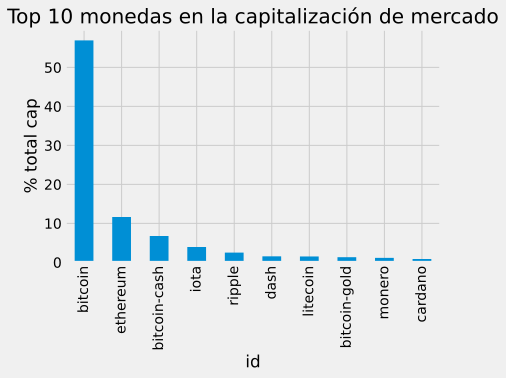

In [94]:
#Declarando ahora para su uso posterior 
TOP_CAP_TITLE = 'Top 10 monedas en la capitalización de mercado'
TOP_CAP_YLABEL = '% total cap'

# Seleccionando las primeras 10 filas y configurando el índice
cap10 = cap[:10].set_index('id')

# Calcule el porcentaje de capitalización de mercado para cada moneda
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum())*100)

# Trazar el gráfico de barras con el título definido anteriormente
ax = cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE)


# Anotando el eje y con la etiqueta definida arriba
ax.set_ylabel(TOP_CAP_YLABEL);

# Hacer que la trama sea más fácil de leer y más informativa.
Si bien la trama anterior es lo suficientemente informativa, se puede mejorar. Bitcoin es demasiado grande y las otras monedas son difíciles de distinguir debido a esto. En lugar del porcentaje, usemos una escala log10 de la capitalización "en bruto". Además, usemos el color para agrupar monedas similares y hacer que la trama sea más informativa

Para la lógica de los colores: bitcoin-cash y bitcoin-gold son bifurcaciones de bitcoin [blockchain] (https://en.wikipedia.org/wiki/Blockchain). Ethereum y Cardano ofrecen Turing Complete [contratos inteligentes] (https://en.wikipedia.org/wiki/Smart_contract). Iota y Ripple no son minables. Dash, Litecoin y Monero obtienen su propio color.

1 _Este coloreado es una simplificación. Hay más diferencias y similitudes que no se representan aquí._

2 _Las bifurcaciones de bitcoin son en realidad **muy** diferentes, pero está fuera del alcance hablar de ellas aquí. Consulte la advertencia anterior y haga su propia investigación._

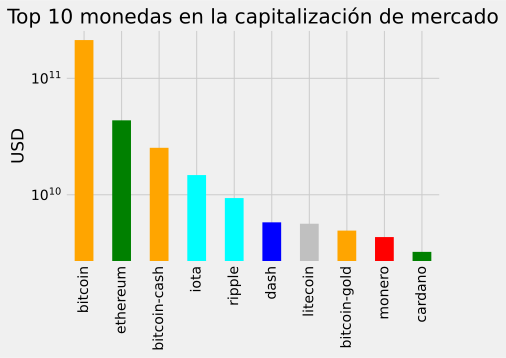

In [95]:
# Colores para el diagrama de barras
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']
# Graficar market_cap_usd como antes pero agregando los colores y escalando el eje y
ax = cap10.market_cap_usd.plot.bar(title=TOP_CAP_TITLE, logy=True, color = COLORS)

# Anotando el eje y con log(USD)
ax.set_ylabel('USD')

#Eliminando el xlabel ya que no es muy informativo
ax.set_xlabel('');

# ¡¿Qué está pasando?! Volatilidad en criptomonedas
El mercado de las criptomonedas ha sido espectacularmente volátil desde que se abrió el primer intercambio. ¡Exploremos un poco más esta volatilidad! Comenzaremos seleccionando y graficando el cambio porcentual de 24 horas y 7 días, que ya tenemos disponible.

In [96]:
# Seleccionando las columnas id, percent_change_24h y percent_change_7d
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Establecer el índice en 'id' y eliminar todas las filas de NaN
volatility = volatility.set_index('id').dropna()

# Ordenando el DataFrame por percent_change_24h en orden ascendente
volatility = volatility.sort_values('percent_change_24h')

#Mostrar las primeras filas 
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


#  Bueno, ya podemos ver que las cosas están un poco locas.
Parece que puedes perder mucho dinero rápidamente con las criptomonedas. Grafiquemos los 10 principales ganadores y los 10 principales perdedores en capitalización de mercado.



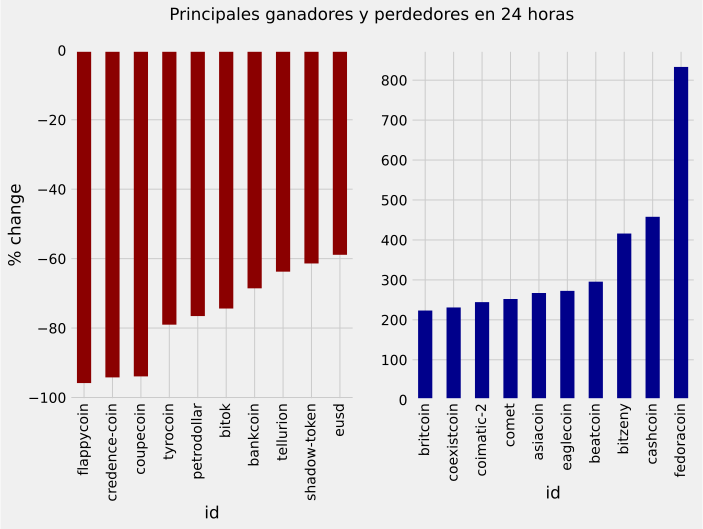

In [97]:
# Definiendo una función con 2 parámetros, la serie a graficar y el título
def top10_subplot(volatility_series, title):
    # haciendo la trama secundaria y la figura para n-rows y n-columns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    # Trazando con pandas el gráfico de barras para los 10 mejores perdedores con el color ROJO
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0])
    # Establecer el título principal en TÍTULO.
    #Establezca el título principal de la figura utilizando el método fig.suptitle()
    fig.suptitle(title)
    # Configurando la ylabel en "% de cambio" usando el objeto axes
    ax.set_ylabel('% change')
    # Igual que arriba, pero para los 10 primeros ganadores y en azul oscuro
    ax = volatility_series[-10:].plot.bar(color="darkblue", ax=axes[1])
    # Devolviendo esto para una buena práctica, podría usarse más tarde
    return fig, ax

DTITLE = "Principales ganadores y perdedores en 24 horas"

# Llamar a la función anterior con la serie volatility.percent_change_24h
# y título DTITLE

fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

#La función asume que volatility_seriesestá ordenado y , por volatility_series[:10]lo tanto, 
# seleccionaría a los 10 principales perdedores y volatility_series[-10:]seleccionaría a los 10 principales ganadores

# Ok, esos son... interesantes. Revisemos también las Series semanales.
800% de aumento diario?! ¿Por qué hacemos este tutorial y no compramos monedas al azar?1

Después de calmarnos, reutilicemos la función definida anteriormente para ver qué sucede semanalmente en lugar de diariamente.

1 Tómese un momento para comprender las implicaciones de los gráficos rojos sobre cuánto valor pierden algunas criptomonedas en períodos de tiempo tan cortos

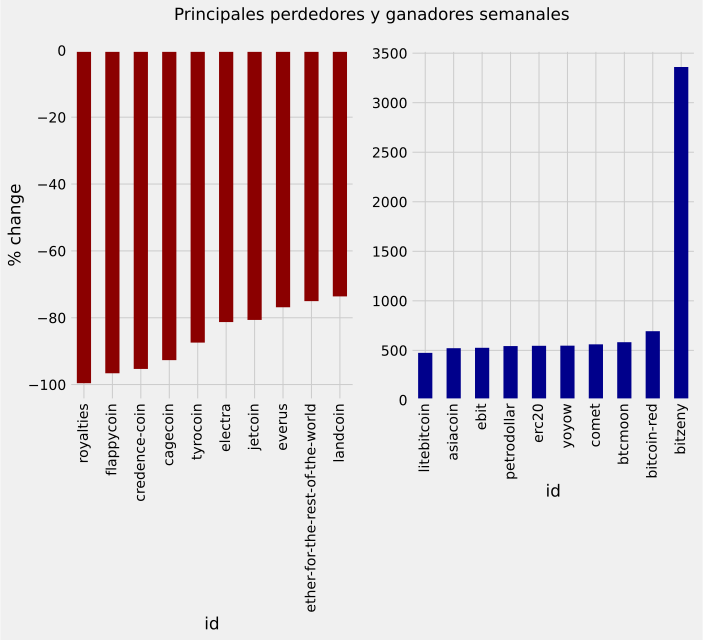

In [98]:
# Ordenando percent_change_7d en orden ascendente
volatility7d = volatility.sort_values("percent_change_7d")

WTITLE = "Principales perdedores y ganadores semanales"

# Llamando a la función top10_subplot
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE);

# ¿Qué tan pequeño es pequeño?
Los nombres de las criptomonedas anteriores son bastante desconocidos y existe una fluctuación considerable entre los cambios porcentuales de 1 y 7 días. Al igual que con las acciones y muchos otros productos financieros, cuanto menor sea la capitalización, mayor será el riesgo y la recompensa. Las criptomonedas más pequeñas son proyectos menos estables en general y, por lo tanto, inversiones incluso más riesgosas que las más grandes1. Clasifiquemos nuestro conjunto de datos según las definiciones de capitalización de Investopedia para acciones de empresas.

1 _Las criptomonedas son una nueva clase de activos, por lo que no son directamente comparables con las acciones. Además, no hay límites escritos en piedra para lo que es una acción "pequeña" o "grande". Finalmente, algunos inversionistas argumentan que bitcoin es similar al oro, esto los haría más comparables a un [commodity](https://www.investopedia.com/terms/c/commodity.asp) en su lugar._

In [99]:
# Seleccionar todo lo que sea más grande que 10 mil millones
#Utilice el .query()método para seleccionar todas las monedas de gran capitalizacióncap en . 
# Es decir, monedas donde market_cap_usdhay +10 mil millones de dólares.
# Asigne el DataFrame resultante a
largecaps = cap.query("market_cap_usd > 1E+10")

# Impresión 
largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


# La mayoría de las monedas son pequeñas
Tenga en cuenta que muchas monedas no son comparables con las grandes empresas en capitalización de mercado, así que vamos a desviarnos de la definición original de Investopedia fusionando categorías.

Esto es todo por ahora. ¡Gracias por completar este proyecto!


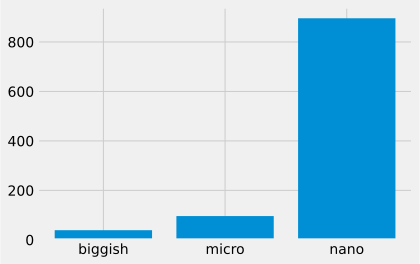

In [100]:
# Hacer una buena función para contar diferentes capitalizaciones de mercado del
# DataFrame "cap". Devuelve un int.
# Cuente cuántas monedas grandes, micro y nano hay usando la función dada capcount

def capcount(query_string):
    return cap.query(query_string).count().id

# Etiquetas para la trama
LABELS = ["biggish", "micro", "nano"]

# usar la funcion capcount para contar las monedas
biggish = capcount("market_cap_usd > 3E+8")

# Lo mismo que arriba, micro capitalizacion
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")

# ... pequeña capitalizacion
nano =  capcount("market_cap_usd < 5E+7")

# hacer una lista con estas tre
values = [biggish, micro, nano]

# Trazándolas con matplotlib
plt.bar(range(len(values)), values, tick_label=LABELS);